In [1]:
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
from HARK.Calibration.Income.IncomeTools import (
     sabelhaus_song_var_profile,
)
import hark_portfolio_agents as hpa
import logging
import math
from math import exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def run_simulation(agent_parameters, dist_params, n_per_class, a=None, q=None, r=1, fm=None, market=None, dphm=1500):
    #initialize population
    pop = hpa.AgentPopulation(agent_parameters, dist_params, n_per_class)
    
    #initialize the financial model
    fm = hpa.FinanceModel() if fm is None else fm
    
    fm.calculate_risky_expectations()
    agent_parameters.update(fm.risky_expectations())
    
    #initialize population model
    pop.init_simulation()
    
    attsim = hpa.AttentionSimulation(pop, fm, a=a, q=q, r=r, market=market, dphm=dphm)
    attsim.simulate()
    
    return attsim, attsim.sim_stats()

In [3]:
dist_params = {
    'CRRA' : {'bot' : 2, 'top' : 10, 'n' : 2}, # Chosen for "interesting" results
    'DiscFac' : {'bot' : 0.936, 'top' : 0.978, 'n' : 2} # from CSTW "MPC" results
}

ssvp = sabelhaus_song_var_profile()

In [4]:
#assume all agents are 27
idx_40 = ssvp['Age'].index(40)

#parameters shared by all agents
agent_parameters = {
    'aNrmInitStd' : 0.0,
    'LivPrb' : [0.98 ** 0.25],
    'PermGroFac': [1.01 ** 0.25],
    'pLvlInitMean' : 1.0, # initial distribution of permanent income
    'pLvlInitStd' : 0.0,
    'Rfree' : 1.0,
    'TranShkStd' : [ssvp['TranShkStd'][idx_40] / 2],  # Adjust non-multiplicative shock to quarterly
    'PermShkStd' : [ssvp['PermShkStd'][idx_40] ** 0.25]
}

In [5]:
market = hpa.MarketPNL(
   seed_limit = 150
)

config_file: ../PNL/macroliquidity.ini
config_local_file: ../PNL/macroliquidity_local.ini


In [6]:
sim, sim_stats = run_simulation(agent_parameters, dist_params, 10, a=0.2, q=8, r=6, dphm=10500, market= market)

Q-0
Output for S:72,BL:0,SL:0 already exists.
Will use cache.


/home/sb/projects/ufm/HARK_ABM_INTRO_public/ufm/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sb/projects/ufm/HARK_ABM_INTRO_public/ufm/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/sb/projects/ufm/HARK_ABM_INTRO_public/ufm/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Testing for blob existence: pnl/LMtransactions_SD17BL0SL87.csv
Output for S:17,BL:0,SL:87 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 121
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD121BL1SL138.csv


NL model: /home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/nl/LiquidityModel_MP_PNL_wBuyBroker_and_SellBroker_thin_out.nlogo
NL model loaded
SETTING: SEED:=121
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=1
SETTING: BkrSel_Limit:=138
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD121BL1SL138.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==121.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==1.0
REPORTING: BkrSel_Limit==138.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING:

Elapsed (sys clock), run 121:  45.112387885000004

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD121BL1SL138.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD40BL0SL192.csv
Output for S:40,BL:0,SL:192 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 79
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD79BL0SL43.csv


NL model loaded
SETTING: SEED:=79
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=43
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD79BL0SL43.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==79.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==43.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 79:  30.985360079000003

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD79BL0SL43.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 102
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD102BL1SL170.csv


NL model loaded
SETTING: SEED:=102
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=1
SETTING: BkrSel_Limit:=170
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD102BL1SL170.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==102.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==1.0
REPORTING: BkrSel_Limit==170.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 102:  29.816666073000007

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD102BL1SL170.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 112
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Q-1
Testing for blob existence: pnl/LMtransactions_SD112BL131SL100.csv


NL model loaded
SETTING: SEED:=112
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=131
SETTING: BkrSel_Limit:=100
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD112BL131SL100.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==112.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==131.0
REPORTING: BkrSel_Limit==100.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==

Elapsed (sys clock), run 112:  29.568317557

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD112BL131SL100.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 77
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD77BL437SL71.csv


NL model loaded
SETTING: SEED:=77
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=437
SETTING: BkrSel_Limit:=71
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD77BL437SL71.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==77.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==437.0
REPORTING: BkrSel_Limit==71.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 77:  29.818771338999994

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD77BL437SL71.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 15
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD15BL216SL139.csv


NL model loaded
SETTING: SEED:=15
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=216
SETTING: BkrSel_Limit:=139
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD15BL216SL139.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==15.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==216.0
REPORTING: BkrSel_Limit==139.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 15:  29.186412863000015

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD15BL216SL139.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD39BL107SL74.csv
Output for S:39,BL:107,SL:74 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD0BL16SL67.csv
Output for S:0,BL:16,SL:67 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 136
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD136BL358SL261.csv


NL model loaded
SETTING: SEED:=136
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=358
SETTING: BkrSel_Limit:=261
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD136BL358SL261.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==136.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==358.0
REPORTING: BkrSel_Limit==261.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==

Elapsed (sys clock), run 136:  29.25694459799999

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD136BL358SL261.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 13
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Q-2
Testing for blob existence: pnl/LMtransactions_SD13BL87SL185.csv


NL model loaded
SETTING: SEED:=13
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=87
SETTING: BkrSel_Limit:=185
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD13BL87SL185.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==13.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==87.0
REPORTING: BkrSel_Limit==185.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 13:  30.126826001000012

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD13BL87SL185.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD69BL44SL23.csv
Output for S:69,BL:44,SL:23 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 85
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD85BL233SL94.csv


NL model loaded
SETTING: SEED:=85
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=233
SETTING: BkrSel_Limit:=94
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD85BL233SL94.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==85.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==233.0
REPORTING: BkrSel_Limit==94.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 85:  30.29424503399997

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD85BL233SL94.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 121
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD121BL255SL21.csv


NL model loaded
SETTING: SEED:=121
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=255
SETTING: BkrSel_Limit:=21
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD121BL255SL21.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==121.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==255.0
REPORTING: BkrSel_Limit==21.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 121:  30.28407818400001

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD121BL255SL21.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 59
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD59BL905SL37.csv


NL model loaded
SETTING: SEED:=59
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=905
SETTING: BkrSel_Limit:=37
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD59BL905SL37.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==59.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==905.0
REPORTING: BkrSel_Limit==37.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 59:  29.396811264000007

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD59BL905SL37.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 46
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD46BL29SL197.csv


NL model loaded
SETTING: SEED:=46
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=29
SETTING: BkrSel_Limit:=197
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD46BL29SL197.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==46.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==29.0
REPORTING: BkrSel_Limit==197.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 46:  29.67523248399999

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD46BL29SL197.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 75
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100


Q-3
Testing for blob existence: pnl/LMtransactions_SD75BL174SL149.csv


liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfilename=LiquidityModel_MP_PNL_wBuyBroker_and_SellBroker_thin_out.nlogo
nlhomedir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/NetLogo-5.3.1-64/netlogo-5.3.1-64/
nliqdem=90
nliqsup=90
nlmodeldir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/nl/
nlruncount=1272
nlver=5
nmktmkr=5
parallelcores=18
periodtoendexecution=3600
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
----------------------------------------------------

Elapsed (sys clock), run 75:  30.261977497000032

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD75BL174SL149.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 126
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD126BL5SL102.csv


NL model loaded
SETTING: SEED:=126
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=5
SETTING: BkrSel_Limit:=102
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD126BL5SL102.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==126.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==5.0
REPORTING: BkrSel_Limit==102.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 126:  29.221048843999995

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD126BL5SL102.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD37BL54SL35.csv
Output for S:37,BL:54,SL:35 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 112
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD112BL56SL40.csv


NL model loaded
SETTING: SEED:=112
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=56
SETTING: BkrSel_Limit:=40
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD112BL56SL40.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==112.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==56.0
REPORTING: BkrSel_Limit==40.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 112:  30.595841310000026

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD112BL56SL40.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 31
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD31BL135SL373.csv


NL model loaded
SETTING: SEED:=31
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=135
SETTING: BkrSel_Limit:=373
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD31BL135SL373.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==31.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==135.0
REPORTING: BkrSel_Limit==373.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 31:  30.164243062999958

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD31BL135SL373.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 145
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD145BL139SL150.csv


NL model loaded
SETTING: SEED:=145
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=139
SETTING: BkrSel_Limit:=150
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD145BL139SL150.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==145.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==139.0
REPORTING: BkrSel_Limit==150.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==

Elapsed (sys clock), run 145:  30.882937632999983

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD145BL139SL150.csv
Checking for existence.
Does not exist. Uploading.
Q-4
Testing for blob existence: pnl/LMtransactions_SD83BL86SL232.csv


Sim ID (SEED): 83
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Elapsed (sys clock), run 83:  30.47844678399997

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD83BL86SL232.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 102
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD102BL298SL133.csv


NL model loaded
SETTING: SEED:=102
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=298
SETTING: BkrSel_Limit:=133
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD102BL298SL133.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==102.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==298.0
REPORTING: BkrSel_Limit==133.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==

Elapsed (sys clock), run 102:  30.523175932999948

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD102BL298SL133.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 83
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD83BL25SL182.csv


NL model loaded
SETTING: SEED:=83
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=25
SETTING: BkrSel_Limit:=182
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD83BL25SL182.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==83.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==25.0
REPORTING: BkrSel_Limit==182.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 83:  29.924453466000045

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD83BL25SL182.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 31
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD31BL175SL126.csv


NL model loaded
SETTING: SEED:=31
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=175
SETTING: BkrSel_Limit:=126
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD31BL175SL126.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==31.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==175.0
REPORTING: BkrSel_Limit==126.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 31:  30.812756778999983

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD31BL175SL126.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 73
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD73BL108SL201.csv


NL model loaded
SETTING: SEED:=73
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=108
SETTING: BkrSel_Limit:=201
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD73BL108SL201.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==73.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==108.0
REPORTING: BkrSel_Limit==201.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 73:  30.183013288999973

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD73BL108SL201.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD43BL18SL167.csv
Output for S:43,BL:18,SL:167 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 147
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK


Q-5
Testing for blob existence: pnl/LMtransactions_SD147BL87SL19.csv


[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfilename=LiquidityModel_MP_PNL_wBuyBroker_and_SellBroker_thin_out.nlogo
nlhomedir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/NetLogo-5.3.1-64/netlogo-5.3.

Elapsed (sys clock), run 147:  29.375389220999978

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD147BL87SL19.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD10BL61SL55.csv
Output for S:10,BL:61,SL:55 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 107
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD107BL446SL306.csv


NL model loaded
SETTING: SEED:=107
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=446
SETTING: BkrSel_Limit:=306
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD107BL446SL306.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==107.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==446.0
REPORTING: BkrSel_Limit==306.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==

Elapsed (sys clock), run 107:  29.208162786999992

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD107BL446SL306.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 100
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD100BL266SL85.csv


NL model loaded
SETTING: SEED:=100
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=266
SETTING: BkrSel_Limit:=85
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD100BL266SL85.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==100.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==266.0
REPORTING: BkrSel_Limit==85.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 100:  29.209302145999914

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD100BL266SL85.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 16
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD16BL38SL231.csv


NL model loaded
SETTING: SEED:=16
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=38
SETTING: BkrSel_Limit:=231
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD16BL38SL231.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==16.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==38.0
REPORTING: BkrSel_Limit==231.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 16:  29.18215124300002

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD16BL38SL231.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 42
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD42BL426SL115.csv


NL model loaded
SETTING: SEED:=42
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=426
SETTING: BkrSel_Limit:=115
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD42BL426SL115.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==42.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==426.0
REPORTING: BkrSel_Limit==115.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 42:  29.108838571999968

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD42BL426SL115.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 104
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0


Q-6
Testing for blob existence: pnl/LMtransactions_SD104BL94SL116.csv


logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfilename=LiquidityModel_MP_PNL_wBuyBroker_and_SellBroker_thin_out.nlogo
nlhomedir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/NetLogo-5.3.1-64/netlogo-5.3.1-64/
nliqdem=90
nliqsup=90
nlmodeldir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/nl/
nlruncount=1272
nlver=5
nmktmkr=5
parallel

Elapsed (sys clock), run 104:  29.102605753000034

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD104BL94SL116.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 105
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD105BL0SL265.csv


NL model loaded
SETTING: SEED:=105
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=265
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD105BL0SL265.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==105.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==265.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 105:  29.157719761999942

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD105BL0SL265.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 118
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD118BL66SL333.csv


NL model loaded
SETTING: SEED:=118
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=66
SETTING: BkrSel_Limit:=333
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD118BL66SL333.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==118.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==66.0
REPORTING: BkrSel_Limit==333.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 118:  29.36370329300007

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD118BL66SL333.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 105
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD105BL82SL17.csv


NL model loaded
SETTING: SEED:=105
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=82
SETTING: BkrSel_Limit:=17
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD105BL82SL17.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==105.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==82.0
REPORTING: BkrSel_Limit==17.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 105:  29.136076595999953

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD105BL82SL17.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 91
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD91BL0SL157.csv


NL model loaded
SETTING: SEED:=91
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=157
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD91BL0SL157.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==91.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==157.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 91:  29.026468250999983

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD91BL0SL157.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD38BL60SL77.csv
Output for S:38,BL:60,SL:77 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 92
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Q-7
Testing for blob existence: pnl/LMtransactions_SD92BL426SL81.csv


NetLogoLink version: 5
NL model: /home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/nl/LiquidityModel_MP_PNL_wBuyBroker_and_SellBroker_thin_out.nlogo
NL model loaded
SETTING: SEED:=92
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=426
SETTING: BkrSel_Limit:=81
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD92BL426SL81.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==92.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==426.0
REPORTING: BkrSel_Limit==81.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: Age

Elapsed (sys clock), run 92:  29.16346629499992

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD92BL426SL81.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 144
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD144BL17SL8.csv


NL model loaded
SETTING: SEED:=144
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=17
SETTING: BkrSel_Limit:=8
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD144BL17SL8.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==144.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==17.0
REPORTING: BkrSel_Limit==8.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 144:  29.08258037099995

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD144BL17SL8.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD16BL0SL186.csv
Output for S:16,BL:0,SL:186 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 88
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD88BL44SL183.csv


NL model loaded
SETTING: SEED:=88
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=44
SETTING: BkrSel_Limit:=183
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD88BL44SL183.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==88.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==44.0
REPORTING: BkrSel_Limit==183.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 88:  29.33790604900014

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD88BL44SL183.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD62BL0SL156.csv
Output for S:62,BL:0,SL:156 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD0BL161SL65.csv
Output for S:0,BL:161,SL:65 already exists in Azure Blob storage.
Will use cache.


In [7]:
import HARK
HARK.__version__

'0.11.0'

In [8]:
data = sim.data()

In [9]:
data

,t,prices,buy,sell,buy_macro,sell_macro,owned,total_assets,mean_income,total_consumption,permshock_std,ror,expected_ror,expected_std
0,0,101.476899,0,0,0,0,4308.759701,561090.571937,28541.959199,0.000000,NaN,0.014769,0.001160,0.012053
1,1,102.975611,0,0,0,0,4274.170961,567036.470022,28449.039124,53826.966514,0.428534,0.014769,0.001673,0.012073
2,2,104.496457,0,0,0,0,4274.170961,573536.825667,28449.039124,0.000000,0.428534,0.014769,0.002166,0.012056
3,3,106.039764,0,0,0,0,4274.170961,580133.185012,28449.039124,0.000000,0.428534,0.014769,0.002640,0.012008
4,4,107.605864,0,0,0,0,4274.170961,586826.965935,28449.039124,0.000000,0.428534,0.014769,0.003097,0.011933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,475,72.013573,0,0,0,0,4398.044898,402945.617979,14167.583261,0.000000,0.509591,0.001547,0.010104,0.021971
476,476,72.124973,0,0,0,0,4398.044898,403435.560967,14167.583261,0.000000,0.509591,0.001547,0.009472,0.021262
477,477,72.236546,0,0,0,0,4372.409317,402074.436065,14056.723095,4499.246181,0.514278,0.001547,0.008886,0.020566
478,478,72.348291,0,0,0,0,4372.409317,397724.526364,13629.287512,39293.964942,0.467108,0.001547,0.008344,0.019885


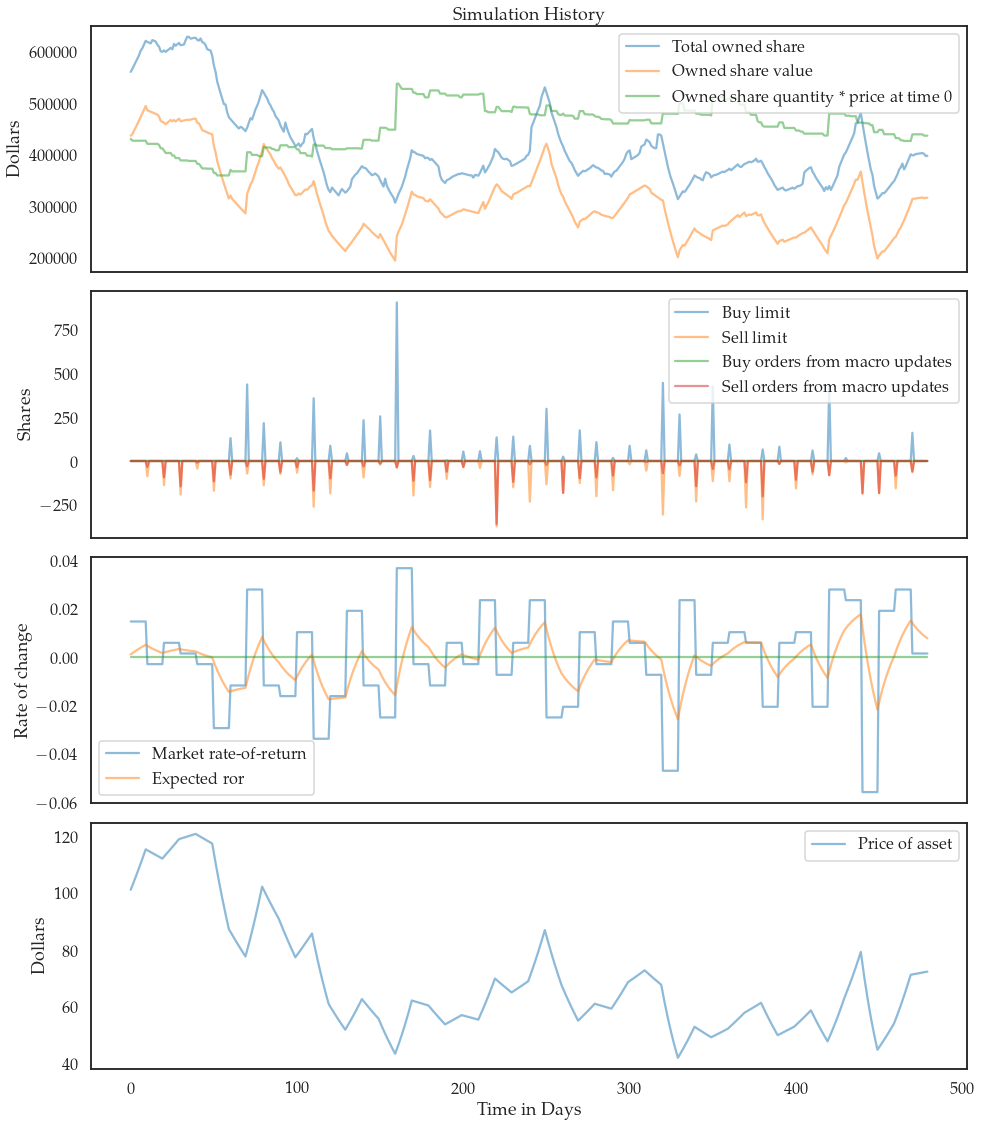

In [12]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


fig, ax = plt.subplots(4,
    sharex='col',
    figsize=(14,16),
)

ax[0].plot(data['total_assets'], alpha=0.5, label='Total owned share')
ax[0].plot([p * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share value')
ax[0].plot([100 * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share quantity * price at time 0')
ax[0].legend()

ax[1].plot(data['buy'], alpha=0.5, label='Buy limit')
ax[1].plot(-data['sell'], alpha=0.5, label='Sell limit')
ax[1].plot(data['buy_macro'], alpha=0.5, label='Buy orders from macro updates')
ax[1].plot(-data['sell_macro'], alpha=0.5, label='Sell orders from macro updates')
ax[1].legend()

ax[2].plot(data['ror'], alpha=0.5, label='Market rate-of-return')
ax[2].plot(data['expected_ror'], alpha=0.5, label='Expected ror')
ax[2].plot(np.zeros(data['expected_ror'].shape), alpha=0.5)
ax[2].legend()

ax[3].plot(data['prices'], alpha=0.5, label='Price of asset')
ax[3].legend()

ax[0].set_title("Simulation History")
ax[0].set_ylabel("Dollars")
ax[1].set_ylabel("Shares")
ax[2].set_ylabel("Rate of change")
ax[3].set_ylabel("Dollars")
ax[3].set_xlabel("Time in Days")

plt.tight_layout()
plt.savefig("asset_bubble_run.png")
plt.show()

